# Data analysis in Python using built-in types

Date: June 22, 2019

-----

## Learning Objectives

* Using the command line to:
    + make directories
    + download files from internet
    + unzip `.zip` files
* Import a `.csv` file without [`pandas`](https://pandas.pydata.org/about.html) or [`numpy`](https://www.numpy.org/)
* Perform data analysis using built-in types
    + working with dates
    + sorting dictionaries
    + for loops and list comprehension
    + visualizing data with [`matplotlib`](https://matplotlib.org/index.html)

## Inspect Files in current working directory

In [1]:
!ls

LICENSE             README.md           data_analysis.ipynb


## Create a new `raw_data` directory

In [2]:
!mkdir raw_data

Let's reinspect our working directory. By typing `ls -l`, we are getting more information about all files and folders such as when things were created.

In [3]:
!ls -l

total 112
-rw-r--r--  1 flatironschool  staff  35149 Jun 28 13:32 LICENSE
-rw-r--r--  1 flatironschool  staff    543 Jun 28 13:32 README.md
-rw-r--r--  1 flatironschool  staff  13980 Jun 28 13:42 data_analysis.ipynb
drwxr-xr-x  2 flatironschool  staff     64 Jun 28 13:42 raw_data


## Install Homebrew

[`homebrew`](https://brew.sh/) is the package manager for MacOS. This tutorial assumes that you have it installed on your machine.

*If not, please uncomment and run the cell below to install `homebrew`.*

In [4]:
/usr/bin/ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)"

NameError: name 'usr' is not defined

In [5]:
!brew install wget

Updating Homebrew...
==> Auto-updated Homebrew!
Updated 1 tap (homebrew/core).
==> New Formulae
anime-downloader
==> Updated Formulae
aliyun-cli                               kubeprod
angular-cli                              latexml
autorest                                 lazygit
aws-sdk-cpp                              ldc
cfn-lint                                 librealsense
circleci                                 libuv
cointop                                  mighttpd2
consul                                   minio
contentful-cli                           minio-mc
convox                                   minizinc
corectl                                  nave
cql                                      nginx
cromwell                                 node
datetime-fortran                         noti
dehydrated                               orc-tools
deno                                     paket
devspace                                 parallel
dhall-json                               

==> Caveats
==> gettext
gettext is keg-only, which means it was not symlinked into /usr/local,
because macOS provides the BSD gettext library & some software gets confused if both are in the library path.

If you need to have gettext first in your PATH run:
  echo 'export PATH="/usr/local/opt/gettext/bin:$PATH"' >> ~/.bash_profile

For compilers to find gettext you may need to set:
  export LDFLAGS="-L/usr/local/opt/gettext/lib"
  export CPPFLAGS="-I/usr/local/opt/gettext/include"

==> openssl
A CA file has been bootstrapped using certificates from the SystemRoots
keychain. To add additional certificates (e.g. the certificates added in
the System keychain), place .pem files in
  /usr/local/etc/openssl/certs

and run
  /usr/local/opt/openssl/bin/c_rehash

openssl is keg-only, which means it was not symlinked into /usr/local,
because Apple has deprecated use of OpenSSL in favor of its own TLS and crypto libraries.

If you need to have openssl first in your PATH run:
  echo 'export PATH="

## Download necessary data

Let's download [King County, WA property sales data](https://info.kingcounty.gov/assessor/DataDownload/default.aspx) into our newly created `raw_data` directory. We'll be using the [`wget`](https://www.gnu.org/software/wget/) package to download local copies of files from the Internet. 

The default directory is the current working directory so we need to specify where `wget` should place the file via the `-P` flag.

```
# <> are placeholders so do not include them in your commands
wget <url> -P <file path>
```

*If you don't have `wget`, uncomment the cell below to have `brew` install it for you.*

In [ ]:
#!brew install wget

In [6]:
!wget https://aqua.kingcounty.gov/extranet/assessor/Real%20Property%20Sales.zip -P raw_data/

--2019-06-28 13:47:08--  https://aqua.kingcounty.gov/extranet/assessor/Real%20Property%20Sales.zip
Resolving aqua.kingcounty.gov (aqua.kingcounty.gov)... 146.129.240.28
Connecting to aqua.kingcounty.gov (aqua.kingcounty.gov)|146.129.240.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124486612 (119M) [application/x-zip-compressed]
Saving to: ‘raw_data/Real Property Sales.zip’

Real Property Sales 100%[===================>] 118.72M  2.28MB/s    in 47s     

2019-06-28 13:47:55 (2.51 MB/s) - ‘raw_data/Real Property Sales.zip’ saved [124486612/124486612]



Let's inspect the contents of `raw_data` to verify that we have the data

In [7]:
!ls -l raw_data/

total 263424
-rw-r--r--  1 flatironschool  staff  124486612 Jun 22 01:18 Real Property Sales.zip


### Unzip `raw_data/Real Property Sales.zip`

Currently the data lives in a [`.zip`](http://cvs.bio.unc.edu/protocol/unzip-help/unzip-help.htm) file, which is essentially a layer that contains the actual data.

To extract - or unpeel - the contents within the `.zip` file, we'll use the [`unzip`](https://formulae.brew.sh/formula/unzip) command. 

By specifying `-d raw_data/`, we're telling `unzip` to place the contents of `raw_data/Real Property Sales.zip` inside the `raw_data/` directory.

*If you don't have `unzip`, uncomment the cell below to have `brew` install it for you.*

In [9]:
!brew install unzip

==> Downloading https://homebrew.bintray.com/bottles/unzip-6.0_4.mojave.bottle.t
######################################################################## 100.0%
==> Pouring unzip-6.0_4.mojave.bottle.tar.gz
==> Caveats
unzip is keg-only, which means it was not symlinked into /usr/local,
because macOS already provides this software and installing another version in
parallel can cause all kinds of trouble.

If you need to have unzip first in your PATH run:
  echo 'export PATH="/usr/local/opt/unzip/bin:$PATH"' >> ~/.bash_profile

==> Summary
🍺  /usr/local/Cellar/unzip/6.0_4: 15 files, 490.1KB


In [10]:
!unzip raw_data/Real\ Property\ Sales.zip -d raw_data/

Archive:  raw_data/Real Property Sales.zip
  inflating: raw_data/EXTR_RPSale.csv  


After unzipping `raw_data/Real Property Sales.zip`, we now have access to the `raw_data/EXTR_RPSale.csv`.

In [11]:
!ls -l raw_data/

total 1331072
-rw-r--r--  1 flatironschool  staff  537813995 Jun 21 18:36 EXTR_RPSale.csv
-rw-r--r--  1 flatironschool  staff  124486612 Jun 22 01:18 Real Property Sales.zip


## Load necessary data

> The `csv` module implements classes to read and write tabular data in CSV format. It allows programmers to say, “write this data in the format preferred by Excel,” or “read data from this file which was generated by Excel,” without knowing the precise details of the CSV format used by Excel. - [`csv` documentation](https://docs.python.org/3/library/csv.html)

### Using the `csv` library

The `csv` library contains objects and other code to read, write, and process data from and to CSV files. Essentially, we want to read each row in the `.csv` file and stores its information for later use. 


### How `csv` works

The [`csv.DictReader()`](https://docs.python.org/3/library/csv.html#csv.DictReader) function creates an object that operates like a regular reader - where information is returned as [strings](https://docs.python.org/3.7/library/stdtypes.html#text-sequence-type-str) - but maps the information in each row to an [OrderedDict](https://docs.python.org/3/library/collections.html#collections.OrderedDict) whose keys are given by the optional `fieldnames` parameter. If `fieldnames` is omitted, the values in the first row of file f will be used as the fieldnames.

Since each row is an `OrderedDict` object, we know that information in each dictionary will be in the same order as they appear within the `.csv` file.

### Inspect the first two rows in the `raw_data/EXTR_RPSale.csv` file

In [13]:
!head -n 2 raw_data/EXTR_RPSale.csv

Now that we know that the first row is the column headers, we can safely omit the `fieldnames` parameter knowing that `csv.DictReader()` will use the first row as the keys within each row.

In [27]:
import csv

sales = []
with open('raw_data/EXTR_RPSale.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        sales.append(row)

The contents of `sales[0]` is exactly the same as it was when we viewed the first two records of the `raw_data/EXTR_RPSale.csv` file from the command line.

In [25]:
sales[0]

OrderedDict([('ExciseTaxNbr', '2671216'),
             ('Major', '098400'),
             ('Minor', '0380'),
             ('DocumentDate', '04/02/2014'),
             ('SalePrice', '0'),
             ('RecordingNbr', '20140602000186'),
             ('Volume', '   '),
             ('Page', '   '),
             ('PlatNbr', '      '),
             ('PlatType', ' '),
             ('PlatLot', '              '),
             ('PlatBlock', '       '),
             ('SellerName',
              'DWORSHAK LYNDEE MARIE                             '),
             ('BuyerName',
              'DWORSHAK MICHAEL J                                '),
             ('PropertyType', '3'),
             ('PrincipalUse', '6'),
             ('SaleInstrument', '15'),
             ('AFForestLand', 'N'),
             ('AFCurrentUseLand', 'N'),
             ('AFNonProfitUse', 'N'),
             ('AFHistoricProperty', 'N'),
             ('SaleReason', '11'),
             ('PropertyClass', '8'),
             ('SaleW

## Data Analysis

Now that you have all the property sales data from King County, WA within the list `sales`, you can finally start to perform some data analysis.

### 1. For each year, how many houses were sold?

Anytime you encounter questions regarding time, you need to know if your data is in [`datetime`](https://docs.python.org/3.7/library/datetime.html) format. `datetime` objects make it easy to date and time calculation.

In [30]:
from datetime import datetime

In [31]:
for sale in sales:
    # transform DocumentDate from string to datetime
    sale["clean_date"] = datetime.strptime(sale["DocumentDate"], 
                                           "%m/%d/%Y")
    # store the sale year and month
    sale["sale_year"] = sale["clean_date"].year
    sale["sale_month"] = sale["clean_date"].month

Let's inspect our work

In [32]:
sales[0]

OrderedDict([('ExciseTaxNbr', '2671216'),
             ('Major', '098400'),
             ('Minor', '0380'),
             ('DocumentDate', '04/02/2014'),
             ('SalePrice', '0'),
             ('RecordingNbr', '20140602000186'),
             ('Volume', '   '),
             ('Page', '   '),
             ('PlatNbr', '      '),
             ('PlatType', ' '),
             ('PlatLot', '              '),
             ('PlatBlock', '       '),
             ('SellerName',
              'DWORSHAK LYNDEE MARIE                             '),
             ('BuyerName',
              'DWORSHAK MICHAEL J                                '),
             ('PropertyType', '3'),
             ('PrincipalUse', '6'),
             ('SaleInstrument', '15'),
             ('AFForestLand', 'N'),
             ('AFCurrentUseLand', 'N'),
             ('AFNonProfitUse', 'N'),
             ('AFHistoricProperty', 'N'),
             ('SaleReason', '11'),
             ('PropertyClass', '8'),
             ('SaleW

For all dictionaries in `sales`, we want to count how many property sales occured in each year. Since the value in `sale_year` is an integer, we can used Python's built-in [`sorted`](https://docs.python.org/3/library/functions.html#sorted) function to transform the `Counter` object into a `list` of `tuples` - `(year, count)` which are sorted in ascending order by year.

OrderedDict([('ExciseTaxNbr', '2671216'),
             ('Major', '098400'),
             ('Minor', '0380'),
             ('DocumentDate', '04/02/2014'),
             ('SalePrice', '0'),
             ('RecordingNbr', '20140602000186'),
             ('Volume', '   '),
             ('Page', '   '),
             ('PlatNbr', '      '),
             ('PlatType', ' '),
             ('PlatLot', '              '),
             ('PlatBlock', '       '),
             ('SellerName',
              'DWORSHAK LYNDEE MARIE                             '),
             ('BuyerName',
              'DWORSHAK MICHAEL J                                '),
             ('PropertyType', '3'),
             ('PrincipalUse', '6'),
             ('SaleInstrument', '15'),
             ('AFForestLand', 'N'),
             ('AFCurrentUseLand', 'N'),
             ('AFNonProfitUse', 'N'),
             ('AFHistoricProperty', 'N'),
             ('SaleReason', '11'),
             ('PropertyClass', '8'),
             ('SaleW

In [35]:
from collections import Counter

sale_year_count = Counter([sale['sale_year'] for sale in sales])
sale_year_count = sorted(sale_year_count.items())
sale_year_count

[(1900, 1),
 (1934, 1),
 (1951, 1),
 (1953, 1),
 (1954, 9),
 (1955, 3),
 (1956, 1),
 (1957, 3),
 (1958, 1),
 (1959, 4),
 (1960, 10),
 (1961, 5),
 (1962, 5),
 (1963, 9),
 (1964, 20),
 (1965, 11),
 (1966, 12),
 (1967, 18),
 (1968, 9),
 (1969, 20),
 (1970, 17),
 (1971, 14),
 (1972, 27),
 (1973, 45),
 (1974, 35),
 (1975, 43),
 (1976, 62),
 (1977, 97),
 (1978, 103),
 (1979, 124),
 (1980, 186),
 (1981, 408),
 (1982, 6035),
 (1983, 8607),
 (1984, 9199),
 (1985, 10557),
 (1986, 14627),
 (1987, 13575),
 (1988, 14190),
 (1989, 17232),
 (1990, 16606),
 (1991, 17524),
 (1992, 67859),
 (1993, 69455),
 (1994, 64912),
 (1995, 57980),
 (1996, 63652),
 (1997, 72090),
 (1998, 79578),
 (1999, 75233),
 (2000, 69874),
 (2001, 71259),
 (2002, 77028),
 (2003, 86299),
 (2004, 89382),
 (2005, 93481),
 (2006, 84725),
 (2007, 73246),
 (2008, 51796),
 (2009, 52383),
 (2010, 54670),
 (2011, 56170),
 (2012, 62438),
 (2013, 69395),
 (2014, 64243),
 (2015, 68891),
 (2016, 70388),
 (2017, 68359),
 (2018, 60822),
 (201

This `list` of `tuples` is not something our employers can use to make a decision. Before we visualize the results, let's create a new `visuals` folder that will store all of our visuals.

In [36]:
!mkdir visuals

In [37]:
from matplotlib import pyplot as plt

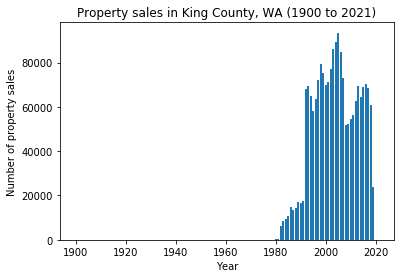

In [38]:
plt.bar(x=[sale[0] for sale in sale_year_count],
        height=[sale[1] for sale in sale_year_count])
plt.xlabel("Year")
plt.ylabel("Number of property sales")
plt.title("Property sales in King County, WA (1900 to 2021)")
plt.savefig("visuals/raw_sales_count_by_year.png",
            dpi=150)
plt.show()

By the looks of our number of property sales over time bar plot, it looks like property sales in King County, WA started taking off in the 1980s. They continued climbing into the early 2000s. Despite the recession reducing the number of home sales in the late 2000s, it looks like they are continuing to climb.

### 2. After removing the one record that took place in 2021, what is the average [nominal](https://www.stlouisfed.org/publications/inside-the-vault/fall-2007/nominal-vs-real-oil-prices) property sales price in King County, WA?

In [ ]:
sales_wo_2021=[]
for i in sales:
    if i['sale_year']!= 2021:
        sales_wo_2021.append(i)

In [71]:
sales_wo_2021
total_sale_price = 0
for i in sales_wo_2021:
    total_sale_price+=int(i['SalePrice'])
total_sale_price
#print([sum(int(i['SalePrice'])) for i in sales_wo_2021])

1199848142529

In [ ]:
avg nominal price in king county over time is $591.399

In [72]:
average_sale = total_sale_price/len(sales_wo_2021)
print(average_sale)

591399.0539024955


### 3. Which property has been sold the most in King County, WA throughout time?

This questions requires you to create a <strong>P</strong>arcel <strong>I</strong>dentification <strong>N</strong>umber (PIN). To learn how to do this, read the "Attribute Information" section on the Parcel webpage from the [King County Geographic Information System (KCGI)](https://www5.kingcounty.gov/sdc/Metadata.aspx?Layer=parcel).

In [73]:
for i in sales_wo_2021:
    i['Pin'] = i['Major']+i['Minor']
    
  
sales_wo_2021[0]

OrderedDict([('ExciseTaxNbr', '2671216'),
             ('Major', '098400'),
             ('Minor', '0380'),
             ('DocumentDate', '04/02/2014'),
             ('SalePrice', '0'),
             ('RecordingNbr', '20140602000186'),
             ('Volume', '   '),
             ('Page', '   '),
             ('PlatNbr', '      '),
             ('PlatType', ' '),
             ('PlatLot', '              '),
             ('PlatBlock', '       '),
             ('SellerName',
              'DWORSHAK LYNDEE MARIE                             '),
             ('BuyerName',
              'DWORSHAK MICHAEL J                                '),
             ('PropertyType', '3'),
             ('PrincipalUse', '6'),
             ('SaleInstrument', '15'),
             ('AFForestLand', 'N'),
             ('AFCurrentUseLand', 'N'),
             ('AFNonProfitUse', 'N'),
             ('AFHistoricProperty', 'N'),
             ('SaleReason', '11'),
             ('PropertyClass', '8'),
             ('SaleW

In [112]:
sale_count = Counter([sale['Pin'] for sale in sales_wo_2021])
sale_count



[('0000000000', 9684),
 ('0524079007', 2248),
 ('2767700505', 188),
 ('1026059013', 104),
 ('0924059109', 92)]

In [107]:
sortedList = sorted(sale_count.items())
sortedList



[('          ', 2),
 ('0000000000', 9684),
 ('0000200001', 7),
 ('0000200003', 4),
 ('0000200006', 1),
 ('0000200007', 1),
 ('0000200008', 8),
 ('0000200009', 8),
 ('0000200010', 1),
 ('0000200012', 8),
 ('0000200013', 1),
 ('0000200015', 1),
 ('0000200017', 6),
 ('0000200035', 1),
 ('0000200037', 4),
 ('0000200038', 3),
 ('0000200039', 1),
 ('0000200040', 2),
 ('0000200041', 4),
 ('0000200042', 2),
 ('0000400001', 3),
 ('0000800001', 2),
 ('0000800002', 11),
 ('0000800003', 2),
 ('0000800004', 4),
 ('0000800005', 4),
 ('0000800006', 1),
 ('0000800009', 7),
 ('0000800011', 3),
 ('0000800012', 6),
 ('0000800013', 3),
 ('0000800014', 2),
 ('0000800015', 4),
 ('0000800016', 2),
 ('0000800017', 2),
 ('0000800018', 1),
 ('0000800019', 3),
 ('0000800020', 3),
 ('0000800021', 1),
 ('0000800022', 3),
 ('0000800023', 6),
 ('0000800024', 6),
 ('0000800025', 12),
 ('0000800026', 6),
 ('0000800027', 1),
 ('0000800028', 1),
 ('0000800029', 6),
 ('0000800030', 2),
 ('0000800031', 8),
 ('0000800032',

In [98]:
def takeSecond(elem):
    return elem[1]

sortedListfinal = sorted(sale_count, key=takeSecond ,reverse=True)

In [ ]:
#or

sale_count.most_common()[0:5]


### 4. Who are the top 5 sellers in terms of who has sold the most property in King County, WA throughout time?

In [93]:
sale_count_per_seller = Counter([sale['SellerName'] for sale in sales_wo_2021])
sale_count_per_seller

Counter({'DWORSHAK LYNDEE MARIE                             ': 2,
         'MOORE JEFFERY A                                   ': 1,
         'THORSON CONNIE+TODD                               ': 1,
         'HART JOHN W II+ANDREA T                           ': 1,
         'SCHWEIGER MICHAEL M                               ': 1,
         'HASTINGS MARGARET JOANN                           ': 1,
         'GINGRICH AUDREY B                                 ': 1,
         'SPANNER DEKEN DEREK                               ': 1,
         'W E RUTH REAL ESTATE INC                          ': 35,
         'GOODWIN TERENCE                                   ': 6,
         'GRIFFIN WILLIAM R                                 ': 5,
         'WESBILD BP INC                                    ': 1,
         'CASSERD FREDA                                     ': 1,
         'PLATT DALE+CAROL ANN                              ': 6,
         'AD APARTMENTS LLC                                 ': 2,
         

In [94]:
sortedList = sorted(sale_count_per_seller.items())
sortedList


[('                                                  ', 2303),
 ('       GREVE DONALD A+JOYCE Y                     ', 1),
 ('     IH2 PROPERTY WASHINGTON LP                   ', 1),
 ('  C LAND CO                                       ', 1),
 ('  MANUKOVA OKSANA O                               ', 1),
 ('  MCAULIFFE GERALD+JAMES M                        ', 1),
 ('  TEICHMAN ROBERT W+HILL MARY JO ET AL            ', 1),
 (' & ALEXANDRA                                      ', 1),
 (' & ALLISON M                                      ', 1),
 (' & BAKER RINA M                                   ', 1),
 (' & BARBARA M                                      ', 1),
 (' & CATHERINE                                      ', 1),
 (' & DAWSON KAREN D & VIYDO JASON M+CAROL M         ', 1),
 (' & HELEN J                                        ', 1),
 (' & JANENE M                                       ', 1),
 (' & L PROPERTIES I LLC                             ', 30),
 (' & LSUSAN F                      

In [100]:
def takeSecond(elem):
    return elem[1]

sortedListfinal = sorted(sortedList, key=takeSecond ,reverse=True)
sortedListfinal[0:5]

[('NORTHWEST TRUSTEE SERVICES INC                    ', 13317),
 ('QUADRANT CORPORATION                              ', 5416),
 ('SSHI LLC                                          ', 4007),
 ('CENTEX HOMES                                      ', 3087),
 ('FEDERAL NATIONAL MORTGAGE ASSOCIATION             ', 2884)]

### 5. From 2009 to 2019, which buyer has bought the most property in King County, WA?

In [104]:
sales_between_2009_and_2019=[]
for i in sales_wo_2021:
    if i['sale_year'] >= 2009 and i['sale_year'] <= 2019:
        sales_between_2009_and_2019.append(i)
sales_between_2009_and_2019


[OrderedDict([('ExciseTaxNbr', '2671216'),
              ('Major', '098400'),
              ('Minor', '0380'),
              ('DocumentDate', '04/02/2014'),
              ('SalePrice', '0'),
              ('RecordingNbr', '20140602000186'),
              ('Volume', '   '),
              ('Page', '   '),
              ('PlatNbr', '      '),
              ('PlatType', ' '),
              ('PlatLot', '              '),
              ('PlatBlock', '       '),
              ('SellerName',
               'DWORSHAK LYNDEE MARIE                             '),
              ('BuyerName',
               'DWORSHAK MICHAEL J                                '),
              ('PropertyType', '3'),
              ('PrincipalUse', '6'),
              ('SaleInstrument', '15'),
              ('AFForestLand', 'N'),
              ('AFCurrentUseLand', 'N'),
              ('AFNonProfitUse', 'N'),
              ('AFHistoricProperty', 'N'),
              ('SaleReason', '11'),
              ('PropertyClass', '